<div class='alert alert-info' >
<h1><center> <font color='blue'>Polynomial Regression<font></center></div></h1>

        Polynomial Regression is a form of regression analysis in which the relationship between the independent varaible x and dependent varaible y is modeled as an nth degree polynomial of x.That is ,if your dataset holds the characteristic of being curved when plotted in the graph ,then you should go with a polynomial regression model instead of Simple or Multiple Linear regression models.

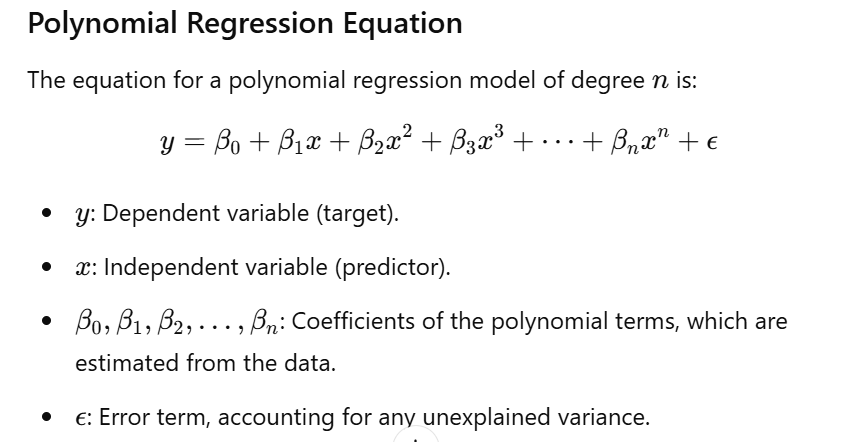

In [13]:
from PIL import Image
Image.open('s20.png')



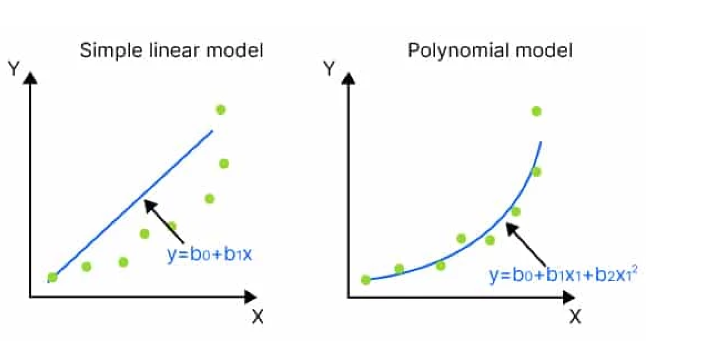

In [8]:
Image.open('plot.png')

#### Example :
        If we want to discover how disease spread ,how a pandomic or epidemic spread over a continent and so on.It completely depends on your data.And based on the non-linear characteristics of your data,you should use polynomial regression.

## When to Use Polynomial Regression

        * When the relationship between the variable is non-linear and can't be captured by a simple linear model.
        * For example,when data has one or more curves , apolynomial regression can model the complex pattern better than linear regression.
        *Polynomial regression can lead to overfitting with high-degree polynomials, so it’s important to choose the degree carefully based on the dataset and application.

## Steps to Achieve the Model :

### 1. Data Preprocessing
### 2.Fitting the model to the training data
### 3.Predicting the results
### 4.Visualization

In [ ]:
#Importing the required Lobraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
#Load the dataset
dataset=pd.read_csv('Position_Salaries.csv')

In [19]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [21]:
dataset.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [23]:
dataset.count()

Position    10
Level       10
Salary      10
dtype: int64

In [ ]:
#data preprocessing

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [21]:
dataset.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [23]:
dataset.duplicated().sum()

0

In [ ]:
#creating a future matrix and dependent vector

In [27]:
X=dataset.iloc[:,1:-1].values
Y=dataset.iloc[:,-1].values

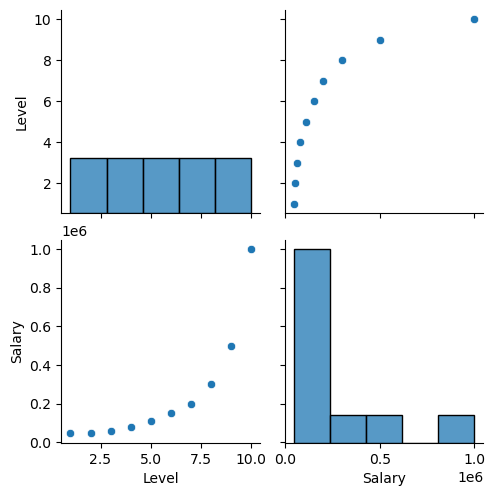

In [35]:
import seaborn as sns
sns.pairplot(dataset)
plt.show()

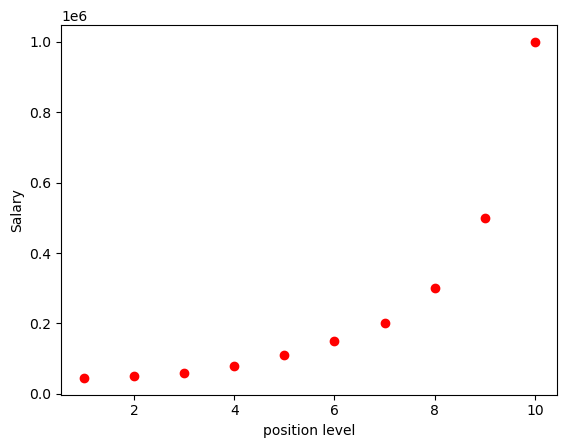

In [29]:
#plotting the data points
plt.scatter(X,Y,color='red')
plt.xlabel("position level")
plt.ylabel('Salary')
plt.show()

        If we see here the datapoints are pasted in a curve like structure that means we should use polynomial regression

In [38]:
# Linear regression

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X,Y)

LinearRegression()

# Polynomial regression
Here we should convert the independent variable to the nth degree of polynomial as per our equations

In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
X_poly=poly_reg.fit_transform(X)
regressor1=LinearRegression()
regressor1.fit(X_poly,Y)

LinearRegression()

In [44]:
X_poly----> it will convert the value untill degree 4 -->power 1,2 ,3, 4

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [29]:
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [66]:
#Predict the Linear regression results
Y_pred=regressor.predict(X)

In [60]:
#predict the Polynomial regression results.
Y_pred_1=regressor1.predict(X_poly)

In [72]:
Y_pred_1

array([ 53356.64335681,  31759.90675996,  58642.19114221,  94632.86713289,
       121724.94172498, 143275.05827508, 184003.49650349, 289994.17249411,
       528694.63869452, 988916.08391594])

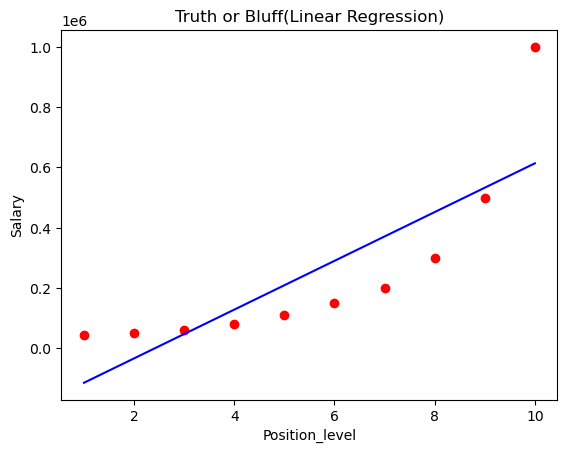

In [74]:
#visualize the Linear Regression results
plt.scatter(X,Y,color='red')
plt.plot(X,Y_pred,color='blue')
plt.title("Truth or Bluff(Linear Regression)")
plt.xlabel('Position_level')
plt.ylabel('Salary')
plt.show()


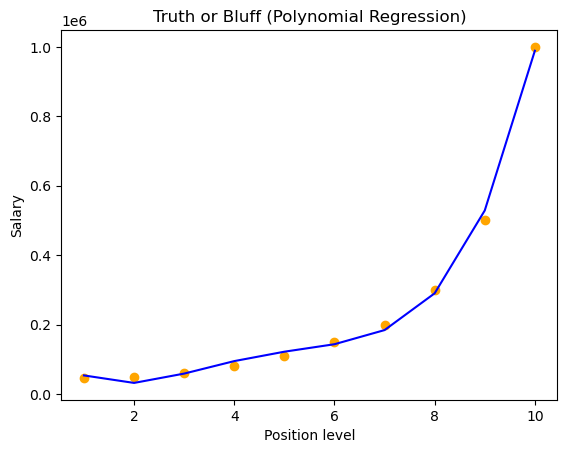

In [86]:
#visualize the Polynomial Regression results
plt.scatter(X,Y,color='orange')
plt.plot(X,Y_pred_1,color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

C:\Users\gadam\AppData\Local\Temp\ipykernel_12036\1114537485.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


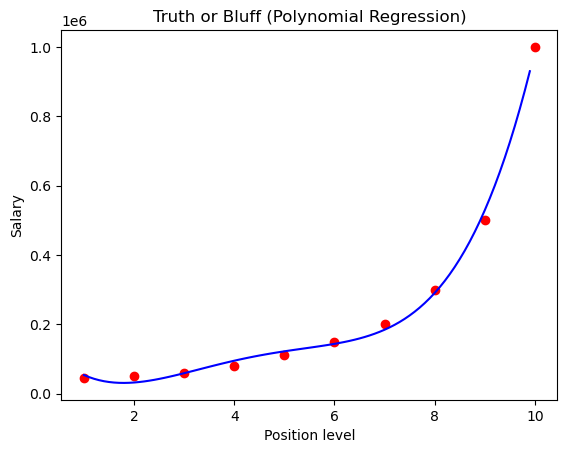

In [94]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, lin_reg.predict(polynomial.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [96]:
# Predicting a new result with Linear Regression
regressor.predict([[6.5]])

array([330378.78787879])

In [108]:
dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [102]:
# Predicting a new result with Polynomial Regression
lin_reg.predict(polynomial.fit_transform([[6.5]]))

array([158862.45265153])